In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz
import requests
import json
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
Payroll_df = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv", low_memory=False)
Payroll_df.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,$47678.00,per Annum,1830.00,$47166.03,2.25,$57.28,$0.00
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,$119959.00,per Annum,1831.00,$119042.50,0.00,$0.00,$0.00
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,$39966.00,per Annum,1181.68,$27452.62,1.00,$21.34,$33.00
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,$116000.00,per Annum,1831.00,$115104.57,0.00,$0.00,$0.00
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,$1.00,per Hour,0.00,$3500.00,0.00,$0.00,$0.00


In [3]:
Payroll_2017 = Payroll_df[Payroll_df["Fiscal Year"]==2017]
Payroll_2017

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
1632222,2017,ADMIN FOR CHILDREN'S SVCS,AARON,TERESA,NaN,03/21/2016,BRONX,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$51315.00,per Annum,1825.00,$51709.59,588.00,$22374.31,$639.66
1632223,2017,ADMIN FOR CHILDREN'S SVCS,AARONS,CAMELIA,M,08/08/2016,BROOKLYN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$51315.00,per Annum,1595.55,$41960.18,121.75,$3892.19,$108.25
1632224,2017,ADMIN FOR CHILDREN'S SVCS,ABDUL,MODUPE,NaN,02/11/2008,BROOKLYN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$54720.00,per Annum,1825.00,$56298.93,54.75,$2455.88,$3938.75
1632225,2017,ADMIN FOR CHILDREN'S SVCS,ABDUL RAHMAN,ABDUL AZIZ,I,10/20/2014,MANHATTAN,CHILD PROTECTIVE SPECIALIST ...,ACTIVE,$54720.00,per Annum,1825.00,$55346.09,273.00,$11069.41,$1124.51
1632226,2017,ADMIN FOR CHILDREN'S SVCS,ABDULGANIYU,MONSURAT,A,02/04/2013,BRONX,JUVENILE COUNSELOR ...,ACTIVE,$44409.00,per Annum,1762.00,$44157.49,815.50,$27878.15,$2019.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194483,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,G,10/02/2006,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$80643.00,per Annum,2051.43,$87321.90,113.00,$7667.53,$3624.24
2194484,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,C,01/18/2000,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$88883.00,per Annum,2051.43,$99746.21,117.00,$9491.90,$3624.24
2194485,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,NaN,03/17/1997,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$89686.00,per Annum,2051.43,$96646.24,63.00,$4937.42,$3624.24
2194486,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,J,04/19/1993,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,$94245.00,per Annum,2051.43,$105281.70,22.00,$1544.83,$3624.24


In [4]:
Value_Count = Payroll_2017.groupby('Agency Name').size().to_frame('Number of Employees').reset_index()
Value_Count.head()

,Agency Name,Number of Employees
0,ADMIN FOR CHILDREN'S SVCS,7344
1,ADMIN TRIALS AND HEARINGS,684
2,BOARD OF CORRECTION,23
3,BOARD OF ELECTION,931
4,BOARD OF ELECTION POLL WORKERS,38943


In [5]:
#Restricting Count for the Education Agencies for 2017
EDU_Agencies =["DEPT OF ED PARA PROFESSIONALS ","DEPT OF ED PEDAGOGICAL        ","DEPT OF ED PER SESSION TEACHER","DEPT OF ED HRLY SUPPORT STAFF ","DEPT OF ED PER DIEM TEACHERS  ","COMMUNITY COLLEGE (MANHATTAN) "]
Count_of_EDU = Value_Count.loc[Value_Count["Agency Name"].isin(EDU_Agencies)]
Count_of_EDU["Number of Employees"].sum()

258420

In [6]:
#Restricting BCount for the Police Agencies for 2017
Police_Agencies =["POLICE DEPARTMENT             ","Police Department","POLICE DEPARTMENT"]
Count_of_Police  = Value_Count.loc[Value_Count["Agency Name"].isin(Police_Agencies)]
Count_of_Police["Number of Employees"].sum()

62516

In [7]:
#Other 3 Agencies
Other_Agencies =["BOARD OF ELECTION             ","FIRE DEPARTMENT               ","DEPT OF PARKS & RECREATION    "]
Count_of_Others = Value_Count.loc[Value_Count["Agency Name"].isin(Other_Agencies)]
Count_of_Others

,Agency Name,Number of Employees
3,BOARD OF ELECTION,931
76,DEPT OF PARKS & RECREATION,15702
89,FIRE DEPARTMENT,18687


In [8]:
#@Roaya TOP 5 NUMBER OF EMPLOYEES PER AGENCY
Top5_NumberofEmployees = pd.DataFrame({'Agency Name':['Department of Education','Board of Election','Police Department','Fire Department','Department of Parks and Rec'],
                   'Number of Employees':[258420,931,62516,18687,15702]})
Top5_NumberofEmployees

,Agency Name,Number of Employees
0,Department of Education,258420
1,Board of Election,931
2,Police Department,62516
3,Fire Department,18687
4,Department of Parks and Rec,15702


In [9]:
Salary_Small = Payroll_2017 [["Agency Name","Base Salary"]]
Salary_Small.head()

,Agency Name,Base Salary
1632222,ADMIN FOR CHILDREN'S SVCS,$51315.00
1632223,ADMIN FOR CHILDREN'S SVCS,$51315.00
1632224,ADMIN FOR CHILDREN'S SVCS,$54720.00
1632225,ADMIN FOR CHILDREN'S SVCS,$54720.00
1632226,ADMIN FOR CHILDREN'S SVCS,$44409.00


In [10]:
New_Base_Salary = Salary_Small[Salary_Small.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
Salary_Small['Base Salary'] = New_Base_Salary
Salary_Small.head()

,Agency Name,Base Salary
1632222,ADMIN FOR CHILDREN'S SVCS,51315.0
1632223,ADMIN FOR CHILDREN'S SVCS,51315.0
1632224,ADMIN FOR CHILDREN'S SVCS,54720.0
1632225,ADMIN FOR CHILDREN'S SVCS,54720.0
1632226,ADMIN FOR CHILDREN'S SVCS,44409.0


In [11]:
Group_Payroll = Salary_Small.groupby(by='Agency Name').agg({'Base Salary': 'sum'}).reset_index()
Group_Payroll

,Agency Name,Base Salary
0,ADMIN FOR CHILDREN'S SVCS,4.624606e+08
1,ADMIN TRIALS AND HEARINGS,2.194061e+07
2,BOARD OF CORRECTION,1.968335e+06
3,BOARD OF ELECTION,2.777822e+07
4,BOARD OF ELECTION POLL WORKERS,3.905400e+04
...,...,...
149,STATEN ISLAND COMMUNITY BD #2,9.235155e+04
150,STATEN ISLAND COMMUNITY BD #3,2.145470e+05
151,TAX COMMISSION,4.175938e+06
152,TAXI & LIMOUSINE COMMISSION,3.571399e+07


In [12]:
#Restricting Base Salaries for the Education Agencies
EDU_Agencies =["DEPT OF ED PARA PROFESSIONALS ","DEPT OF ED PEDAGOGICAL        ","DEPT OF ED PER SESSION TEACHER","DEPT OF ED HRLY SUPPORT STAFF ","DEPT OF ED PER DIEM TEACHERS  ","COMMUNITY COLLEGE (MANHATTAN) "]
Base_Salary_of_EDU = Group_Payroll.loc[Group_Payroll["Agency Name"].isin(EDU_Agencies)]
Base_Salary_of_EDU["Base Salary"].sum()
#Group_Payroll["Agency Name"].unique()

10105228901.600033

In [13]:
#Restricting Base Salaries for the the Police Agencies
#Group_Payroll["Agency Name"].unique()
Police_Agencies =["POLICE DEPARTMENT             ","Police Department","POLICE DEPARTMENT"]
Base_Salary_of_Police = Group_Payroll.loc[Group_Payroll["Agency Name"].isin(Police_Agencies)]
Base_Salary_of_Police["Base Salary"].sum()

4204159395.5099564

In [14]:
#Other 3 Agencies
#Group_Payroll["Agency Name"].unique()
Other_Agencies =["BOARD OF ELECTION             ","FIRE DEPARTMENT               ","DEPT OF PARKS & RECREATION    "]
Base_Salary_Other_Agencies = Group_Payroll.loc[Group_Payroll["Agency Name"].isin(Other_Agencies)]
Base_Salary_Other_Agencies["Base Salary"] = Base_Salary_Other_Agencies["Base Salary"].map("{:.2f}".format)
Base_Salary_Other_Agencies

,Agency Name,Base Salary
3,BOARD OF ELECTION,27778222.79
76,DEPT OF PARKS & RECREATION,263305894.79
89,FIRE DEPARTMENT,1339017340.33


In [15]:
#Base Salaries for the Top 5 Agencies @Jatin
Top5_Base_Salaries = pd.DataFrame({'Agency Name':['Department of Education','Board of Election','Police Department','Fire Department','Department of Parks and Rec'],
                   'Base Salary':[10105228901.600033,27778222.79,4204159395.5099564,1339017340.33,263305894.79]})
Top5_Base_Salaries["Base Salary"] = Top5_Base_Salaries["Base Salary"].map("{:.2f}".format)
Top5_Base_Salaries

,Agency Name,Base Salary
0,Department of Education,10105228901.60
1,Board of Election,27778222.79
2,Police Department,4204159395.51
3,Fire Department,1339017340.33
4,Department of Parks and Rec,263305894.79


In [16]:
#Overtime Hours
Payroll_Small = Payroll_2017[["Agency Name","OT Hours", "Total OT Paid"]]
Payroll_Small.head()

,Agency Name,OT Hours,Total OT Paid
1632222,ADMIN FOR CHILDREN'S SVCS,588.00,$22374.31
1632223,ADMIN FOR CHILDREN'S SVCS,121.75,$3892.19
1632224,ADMIN FOR CHILDREN'S SVCS,54.75,$2455.88
1632225,ADMIN FOR CHILDREN'S SVCS,273.00,$11069.41
1632226,ADMIN FOR CHILDREN'S SVCS,815.50,$27878.15


In [17]:
Total_Pay_OT = Payroll_Small[Payroll_Small.columns[2]].replace('[\$,]', '', regex=True).astype(float)
Payroll_Small['Total OT Paid'] = Total_Pay_OT
Payroll_Small.head()

,Agency Name,OT Hours,Total OT Paid
1632222,ADMIN FOR CHILDREN'S SVCS,588.00,22374.31
1632223,ADMIN FOR CHILDREN'S SVCS,121.75,3892.19
1632224,ADMIN FOR CHILDREN'S SVCS,54.75,2455.88
1632225,ADMIN FOR CHILDREN'S SVCS,273.00,11069.41
1632226,ADMIN FOR CHILDREN'S SVCS,815.50,27878.15


In [18]:
Group_OT = Payroll_Small.groupby(by='Agency Name').agg({'OT Hours': 'sum', 'Total OT Paid': 'sum'}).reset_index()
Group_OT.head()

,Agency Name,OT Hours,Total OT Paid
0,ADMIN FOR CHILDREN'S SVCS,1122396.34,48867261.31
1,ADMIN TRIALS AND HEARINGS,1329.50,52351.83
2,BOARD OF CORRECTION,0.00,0.00
3,BOARD OF ELECTION,285969.92,8979653.64
4,BOARD OF ELECTION POLL WORKERS,0.00,0.00


In [19]:
#Restricting Overtime for the Education Agencies
EDU_Agencies =["DEPT OF ED PARA PROFESSIONALS ","DEPT OF ED PEDAGOGICAL        ","DEPT OF ED PER SESSION TEACHER","DEPT OF ED HRLY SUPPORT STAFF ","DEPT OF ED PER DIEM TEACHERS  ","COMMUNITY COLLEGE (MANHATTAN) "]
Overtime_of_EDU = Group_OT.loc[Group_OT["Agency Name"].isin(EDU_Agencies)]
Overtime_of_EDU["OT Hours"].sum()

60169.03999999999

In [20]:
Overtime_of_EDU["Total OT Paid"].sum()

7410125.830000009

In [21]:
#Restricting Base Salaries for the the Police Agencies
#Group_Payroll["Agency Name"].unique()
Police_Agencies =["POLICE DEPARTMENT             ","Police Department","POLICE DEPARTMENT"]
Overtime_of_Police = Group_OT.loc[Group_OT["Agency Name"].isin(Police_Agencies)]
Overtime_of_Police["OT Hours"].sum()

11776939.350000035

In [22]:
Overtime_of_Police["Total OT Paid"].sum()

767025971.5000086

In [23]:
#Other 3 Agencies
#Group_Payroll["Agency Name"].unique()
Other_Agencies =["BOARD OF ELECTION             ","FIRE DEPARTMENT               ","DEPT OF PARKS & RECREATION    "]
Overtime_of_Others  = Group_OT.loc[Group_OT["Agency Name"].isin(Other_Agencies)]
Overtime_of_Others["Total OT Paid"] = Overtime_of_Others["Total OT Paid"].map("{:.2f}".format)
Overtime_of_Others

,Agency Name,OT Hours,Total OT Paid
3,BOARD OF ELECTION,285969.92,8979653.64
76,DEPT OF PARKS & RECREATION,534469.05,21937680.41
89,FIRE DEPARTMENT,5527322.99,345532164.69


In [24]:
#Overtime for Top 5 Agencies @Jatin
Top5_OT = pd.DataFrame({'Agency Name':['Department of Education','Board of Election','Police Department','Fire Department','Department of Parks and Rec'],
                   'OT Hours':[60169.03999999999,285969.92,11776939.350000035,5527322.99,534469.05],
                       'OT Paid':[7410125.830000009,8979653.64,767025971.5000086,345532164.69,21937680.41]})
Top5_OT["OT Paid"] = Top5_OT["OT Paid"].map("{:.2f}".format)
Top5_OT

,Agency Name,OT Hours,OT Paid
0,Department of Education,60169.04,7410125.83
1,Board of Election,285969.92,8979653.64
2,Police Department,11776939.35,767025971.50
3,Fire Department,5527322.99,345532164.69
4,Department of Parks and Rec,534469.05,21937680.41


In [25]:
Top5_Summary = pd.merge(Top5_Base_Salaries, Top5_OT, on="Agency Name")
Top5_Summary

,Agency Name,Base Salary,OT Hours,OT Paid
0,Department of Education,10105228901.60,60169.04,7410125.83
1,Board of Election,27778222.79,285969.92,8979653.64
2,Police Department,4204159395.51,11776939.35,767025971.50
3,Fire Department,1339017340.33,5527322.99,345532164.69
4,Department of Parks and Rec,263305894.79,534469.05,21937680.41


In [26]:
Top5_Summary2 = pd.merge(Top5_NumberofEmployees,Top5_Summary,on="Agency Name")
Top5_Summary2

,Agency Name,Number of Employees,Base Salary,OT Hours,OT Paid
0,Department of Education,258420,10105228901.60,60169.04,7410125.83
1,Board of Election,931,27778222.79,285969.92,8979653.64
2,Police Department,62516,4204159395.51,11776939.35,767025971.50
3,Fire Department,18687,1339017340.33,5527322.99,345532164.69
4,Department of Parks and Rec,15702,263305894.79,534469.05,21937680.41


In [27]:
budget_df = pd.read_csv("Resources/Expense_Budget.csv")
budget_df.head()

,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,...,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
0,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,9750.0,8950.0,9750.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,4500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20160426,2017,2,MAYORALTY,21,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,15390.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#Group agencie Budget data by year (2017)

agencies_2017 = budget_df.loc[budget_df["Fiscal Year"] == 2017]
#agencies_2017["Current Modified Budget Amount"] = (agencies_2017["Current Modified Budget Amount"].str.split()).apply(lambda x: float(x[0].replace(',','')))

#agencies_2017.dtypes
agencies_2017_grouped = agencies_2017.groupby("Agency Name")
budget_2017 = pd.DataFrame(agencies_2017_grouped["Current Modified Budget Amount"].sum()).reset_index()

#Restricting to only 5 agencies of interest
Top_5 = ["BOARD OF ELECTIONS","DEPARTMENT OF EDUCATION","POLICE DEPARTMENT","FIRE DEPARTMENT","DEPARTMENT OF PARKS AND RECREATION"]

Budget_Top_5 = budget_2017.loc[budget_2017["Agency Name"].isin(Top_5)]
Budget_Top_5["Current Modified Budget Amount"] = Budget_Top_5["Current Modified Budget Amount"].map("{:.2f}".format)

#Converting to match payroll Agency Name Format so that we can merge dataframes
Top5_Budget = pd.DataFrame({'Agency Name':['Department of Education','Board of Election','Police Department','Fire Department','Department of Parks and Rec'],
                   '2017 Budget Amount':[44218195769.00,274828362.00,11034488851.00,4086956050.00,987355850.00]})
Top5_Budget["2017 Budget Amount"] = Top5_Budget["2017 Budget Amount"].map("{:.2f}".format)
Top5_Budget

,Agency Name,2017 Budget Amount
0,Department of Education,44218195769.00
1,Board of Election,274828362.00
2,Police Department,11034488851.00
3,Fire Department,4086956050.00
4,Department of Parks and Rec,987355850.00


In [29]:
Top5_Summary3 = pd.merge(Top5_Budget,Top5_Summary2,on="Agency Name")
Top5_Summary3.loc[:, "OT Paid"] = Top5_Summary3["OT Paid"].astype("float")
Top5_Summary3.loc[:, "2017 Budget Amount"] = Top5_Summary3["2017 Budget Amount"].astype("float")
Top5_Summary3.loc[:, "Base Salary"] = Top5_Summary3["Base Salary"].astype("float")
Top5_Summary3

,Agency Name,2017 Budget Amount,Number of Employees,Base Salary,OT Hours,OT Paid
0,Department of Education,4.421820e+10,258420,1.010523e+10,60169.04,7.410126e+06
1,Board of Election,2.748284e+08,931,2.777822e+07,285969.92,8.979654e+06
2,Police Department,1.103449e+10,62516,4.204159e+09,11776939.35,7.670260e+08
3,Fire Department,4.086956e+09,18687,1.339017e+09,5527322.99,3.455322e+08
4,Department of Parks and Rec,9.873558e+08,15702,2.633059e+08,534469.05,2.193768e+07


In [30]:
Total_Salary = Top5_Summary3["Base Salary"]+Top5_Summary3["OT Paid"]
Top5_Summary3["Total_Salary"] = Total_Salary

#Top5_Summary3.loc[:, "Total_Salary"] = Top5_Summary3["Total_Salary"].astype("float")
#Top5_Summary3 =Top5_Summary3[Top5_Summary3["Total_Salary"].apply(lambda x: x.isdigit())]
Top5_Summary3

,Agency Name,2017 Budget Amount,Number of Employees,Base Salary,OT Hours,OT Paid,Total_Salary
0,Department of Education,4.421820e+10,258420,1.010523e+10,60169.04,7.410126e+06,1.011264e+10
1,Board of Election,2.748284e+08,931,2.777822e+07,285969.92,8.979654e+06,3.675788e+07
2,Police Department,1.103449e+10,62516,4.204159e+09,11776939.35,7.670260e+08,4.971185e+09
3,Fire Department,4.086956e+09,18687,1.339017e+09,5527322.99,3.455322e+08,1.684550e+09
4,Department of Parks and Rec,9.873558e+08,15702,2.633059e+08,534469.05,2.193768e+07,2.852436e+08


In [31]:
Salary_Percent_of_Budget = (Top5_Summary3["Total_Salary"]/Top5_Summary3["2017 Budget Amount"])*100
Top5_Summary3["Salary_Percent_of_Budget"] = Salary_Percent_of_Budget

Top5_Summary3= Top5_Summary3.sort_values(by=["Salary_Percent_of_Budget"], ascending=False)

#Top5_Summary3.dtypes
Top5_Summary3.head()

,Agency Name,2017 Budget Amount,Number of Employees,Base Salary,OT Hours,OT Paid,Total_Salary,Salary_Percent_of_Budget
2,Police Department,1.103449e+10,62516,4.204159e+09,11776939.35,7.670260e+08,4.971185e+09,45.051343
3,Fire Department,4.086956e+09,18687,1.339017e+09,5527322.99,3.455322e+08,1.684550e+09,41.217705
4,Department of Parks and Rec,9.873558e+08,15702,2.633059e+08,534469.05,2.193768e+07,2.852436e+08,28.889642
0,Department of Education,4.421820e+10,258420,1.010523e+10,60169.04,7.410126e+06,1.011264e+10,22.869859
1,Board of Election,2.748284e+08,931,2.777822e+07,285969.92,8.979654e+06,3.675788e+07,13.374848


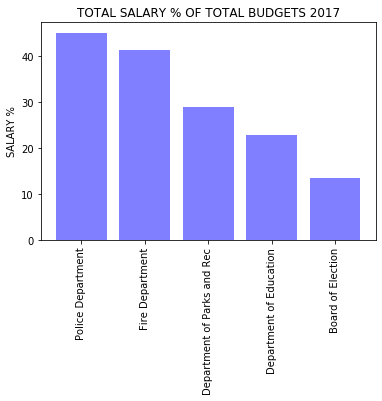

In [32]:
# Generate the Plot
#row = Top5_Summary3["Salary_Percent_of_Budget"]
#row.plot(kind='bar')
plt.bar( Top5_Summary3["Agency Name"],Top5_Summary3["Salary_Percent_of_Budget"], color='b', alpha=0.5)
plt.title("TOTAL SALARY % OF TOTAL BUDGETS 2017")
plt.ylabel("SALARY %")


plt.xticks(rotation="vertical")
plt.show()


#plt.xlabel("Top5_Summary3["Salary_Percent_of_Budget"]")
#plt.legend()
#plt.grid()
# Save the Figure
# plt.savefig("Salary Percent of 2017 Budget by Agency.png")

In [33]:
Total_OT = Top5_Summary3["Base Salary"]+Top5_Summary3["OT Paid"]
Top5_Summary3["Total_OT"] = Total_OT

#Top5_Summary3.loc[:, "Total_Salary"] = Top5_Summary3["Total_Salary"].astype("float")
#Top5_Summary3 =Top5_Summary3[Top5_Summary3["Total_Salary"].apply(lambda x: x.isdigit())]
Top5_Summary3

,Agency Name,2017 Budget Amount,Number of Employees,Base Salary,OT Hours,OT Paid,Total_Salary,Salary_Percent_of_Budget,Total_OT
2,Police Department,1.103449e+10,62516,4.204159e+09,11776939.35,7.670260e+08,4.971185e+09,45.051343,4.971185e+09
3,Fire Department,4.086956e+09,18687,1.339017e+09,5527322.99,3.455322e+08,1.684550e+09,41.217705,1.684550e+09
4,Department of Parks and Rec,9.873558e+08,15702,2.633059e+08,534469.05,2.193768e+07,2.852436e+08,28.889642,2.852436e+08
0,Department of Education,4.421820e+10,258420,1.010523e+10,60169.04,7.410126e+06,1.011264e+10,22.869859,1.011264e+10
1,Board of Election,2.748284e+08,931,2.777822e+07,285969.92,8.979654e+06,3.675788e+07,13.374848,3.675788e+07


In [34]:
Salary_Percent_of_Budget = (Top5_Summary3["OT Paid"]/Top5_Summary3["2017 Budget Amount"])*100
Top5_Summary3["OT_Percent_of_Budget"] = Salary_Percent_of_Budget

Top5_Summary3= Top5_Summary3.sort_values(by=["OT_Percent_of_Budget"], ascending=False)

#Top5_Summary3.dtypes
Top5_Summary3.head()

,Agency Name,2017 Budget Amount,Number of Employees,Base Salary,OT Hours,OT Paid,Total_Salary,Salary_Percent_of_Budget,Total_OT,OT_Percent_of_Budget
3,Fire Department,4.086956e+09,18687,1.339017e+09,5527322.99,3.455322e+08,1.684550e+09,41.217705,1.684550e+09,8.454511
2,Police Department,1.103449e+10,62516,4.204159e+09,11776939.35,7.670260e+08,4.971185e+09,45.051343,4.971185e+09,6.951169
1,Board of Election,2.748284e+08,931,2.777822e+07,285969.92,8.979654e+06,3.675788e+07,13.374848,3.675788e+07,3.267368
4,Department of Parks and Rec,9.873558e+08,15702,2.633059e+08,534469.05,2.193768e+07,2.852436e+08,28.889642,2.852436e+08,2.221862
0,Department of Education,4.421820e+10,258420,1.010523e+10,60169.04,7.410126e+06,1.011264e+10,22.869859,1.011264e+10,0.016758


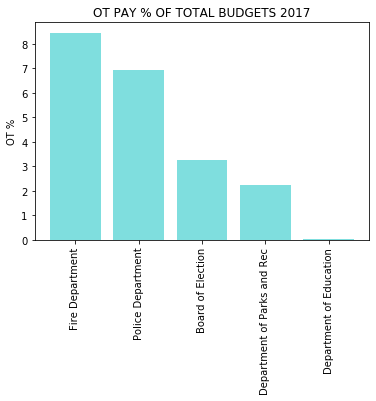

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate the Plot
#row = Top5_Summary3["Salary_Percent_of_Budget"]
#row.plot(kind='bar')
plt.bar( Top5_Summary3["Agency Name"],Top5_Summary3["OT_Percent_of_Budget"], color='c', alpha=0.5)
plt.title("OT PAY % OF TOTAL BUDGETS 2017")
plt.ylabel("OT %")


plt.xticks(rotation="vertical")
plt.show()


#plt.xlabel("Top5_Summary3["Salary_Percent_of_Budget"]")
#plt.legend()
#plt.grid()

# Save the Figure
plt.savefig("OT Paid Percent of 2017 Budget by Agency.png")